## Task-D: Collinear features and their effect on linear models

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [4]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

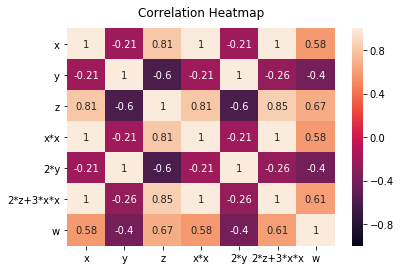

In [5]:
Xc = data.drop(['target'], axis=1).corr()
heatmap = sns.heatmap(Xc, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

#https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

In [6]:
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.3)
noise = np.random.normal(1*(10**-2),5*(10**-2),70*7)
Xp=(x_train+noise.reshape(70,7)).copy() #Perturbation


In [7]:
clf = SGDClassifier(loss='hinge',max_iter=1000, tol=1e-3,random_state=0)
clf.fit(x_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=0, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [8]:
grid={"alpha":np.logspace(-3,3,7)}
clf_cv=GridSearchCV(clf,grid,cv=10)
clf_cv.fit(x_train,y_train)

C:\Users\pravi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=0, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [9]:
best_score = clf_cv.best_score_
print(best_score)

1.0


In [10]:
best_model = SGDClassifier(alpha=best_score,loss='hinge',max_iter=1000, tol=1e-3,random_state=0) # the loss parameter can be changed to log for Logistic Regression for task 2. It is hinge/LinearSVc now 
best_model.fit(x_train,y_train)
bm_y_pred = best_model.predict(x_test)
best_model_accuracy=f1_score(y_test,bm_y_pred)
print(best_model_accuracy)
W = best_model.coef_
print(W)

1.0
[[ 0.17749523 -0.20570808  0.38907192  0.16484329 -0.20570808  0.19533398
   0.12146129]]


In [11]:
best_model.fit(Xp,y_train)
bm_y_pred_edited = best_model.predict(x_test)
best_model_accuracy_edited=f1_score(y_test,bm_y_pred_edited)
print(best_model_accuracy_edited)
Wdash= best_model.coef_
print(Wdash)

1.0
[[ 0.17212182 -0.1978744   0.39440808  0.16590137 -0.19445287  0.19180971
   0.1272589 ]]


In [12]:
delta = (abs(W-Wdash))

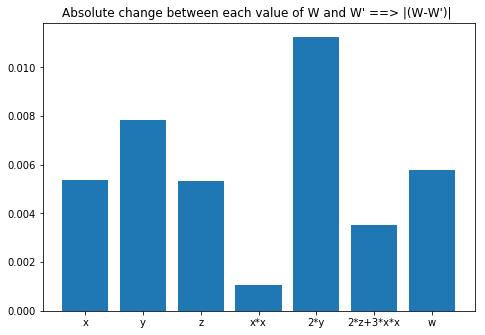

In [13]:
plotdata = delta[0]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
features = ["x","y","z","x*x","2*y","2*z+3*x*x","w"]
weights = abs(plotdata)
ax.bar(features,weights)
plt.title("Absolute change between each value of W and W' ==> |(W-W')| ")
plt.show()

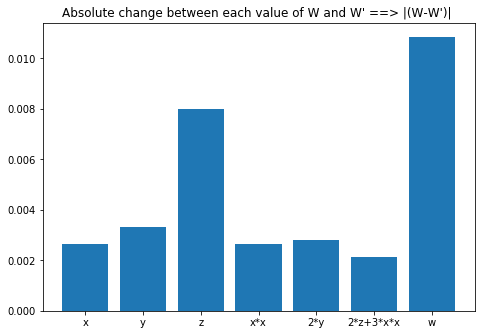

### Linear SVC/SGD hinge loss

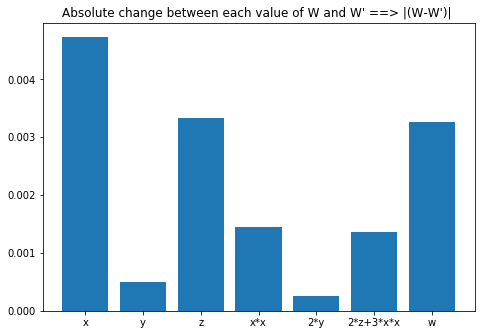
### Logistic Regression/SGD log loss

Multi collinearity affects both the LinearSVC and Logistic Regression.

Observations.

1. The change in the weight vector before and after perturbation is arbitrarily changing for both the models.
2. According to the Pertubation technique, when the difference is signification we can conclude that the features are multicollinear. This can be observed here.